In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv",dtype='unicode')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   adult                  45466 non-null  object
 1   belongs_to_collection  4494 non-null   object
 2   budget                 45466 non-null  object
 3   genres                 45466 non-null  object
 4   homepage               7782 non-null   object
 5   id                     45466 non-null  object
 6   imdb_id                45449 non-null  object
 7   original_language      45455 non-null  object
 8   original_title         45466 non-null  object
 9   overview               44512 non-null  object
 10  popularity             45461 non-null  object
 11  poster_path            45080 non-null  object
 12  production_companies   45463 non-null  object
 13  production_countries   45463 non-null  object
 14  release_date           45379 non-null  object
 15  revenue            

In [3]:
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0


In [4]:
data['revenue']=pd.to_numeric(data['revenue'], errors='coerce')
data['budget']=pd.to_numeric(data['budget'], errors='coerce')
data['popularity']=pd.to_numeric(data['popularity'], errors='coerce')
data['vote_average']=pd.to_numeric(data['vote_average'], errors='coerce')
data['vote_count']=pd.to_numeric(data['vote_count'], errors='coerce')
data['runtime']=pd.to_numeric(data['runtime'], errors='coerce')
data['id']=pd.to_numeric(data['id'], errors='coerce')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45463 non-null  float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45463 non-null  float64
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224579e+06,108359.918813,2.921478,1.120935e+07,94.128199,5.618207,109.897338
std,1.742413e+07,112460.749278,6.005414,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385948,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127685,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678902,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [7]:
data.drop(data[data['budget']>45000000].index,inplace=True)
data.drop(data[data['budget']<5500000].index,inplace=True)
data.drop(data[data['popularity']<3].index,inplace=True)
data.drop(data[data['popularity']>30].index,inplace=True)
data.drop(data[data['revenue']<10000000].index,inplace=True)
data.drop(data[data['revenue']>90000000].index,inplace=True)
data.drop(data[data['vote_count']<50].index,inplace=True)
data.drop(data[data['vote_count']>800].index,inplace=True)
data.drop(data[data['vote_average']<1].index,inplace=True)

In [8]:
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,1.207000e+03,1207.000000,1207.000000,1.207000e+03,1207.000000,1207.000000,1207.000000
mean,2.079581e+07,48580.219553,8.790271,3.710383e+07,108.173985,6.122370,284.221210
std,1.037724e+07,88101.732899,3.145005,2.112927e+07,19.912234,0.801665,191.844909
min,5.500000e+06,16.000000,3.319516,1.000681e+07,0.000000,2.800000,50.000000
25%,1.200000e+07,9411.500000,6.493645,1.888582e+07,95.500000,5.600000,130.500000
50%,2.000000e+07,11542.000000,8.236472,3.210100e+07,105.000000,6.200000,237.000000
75%,2.800000e+07,27757.500000,10.723675,5.131313e+07,117.000000,6.700000,391.000000
max,4.500000e+07,418437.000000,24.644321,8.980000e+07,248.000000,7.900000,795.000000


In [9]:
null_vals_percent=data.isna().sum()*100/data.shape[0]
null_vals_percent

adult                     0.000000
belongs_to_collection    79.917355
budget                    0.247934
genres                    0.000000
homepage                 70.661157
id                        0.247934
imdb_id                   0.000000
original_language         0.000000
original_title            0.000000
overview                  0.165289
popularity                0.247934
poster_path               0.000000
production_companies      0.000000
production_countries      0.000000
release_date              0.000000
revenue                   0.247934
runtime                   0.247934
spoken_languages          0.247934
status                    0.247934
tagline                   9.586777
title                     0.247934
video                     0.247934
vote_average              0.247934
vote_count                0.247934
dtype: float64

In [10]:
data.dropna(inplace=True)
data.shape

(54, 24)

<Axes: ylabel='revenue'>

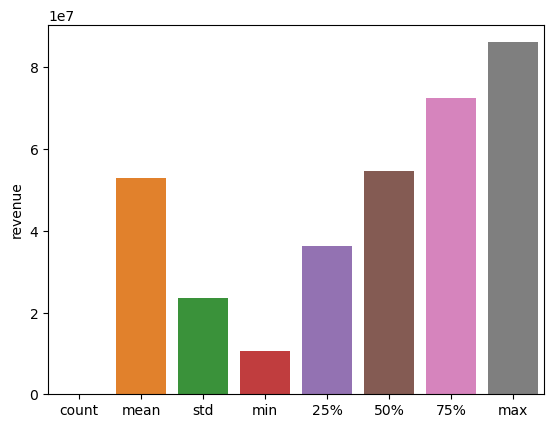

In [11]:
sns.barplot(x=data.describe()['revenue'].index,y=data.describe()['revenue'],data = data)

<Axes: xlabel='runtime', ylabel='Count'>

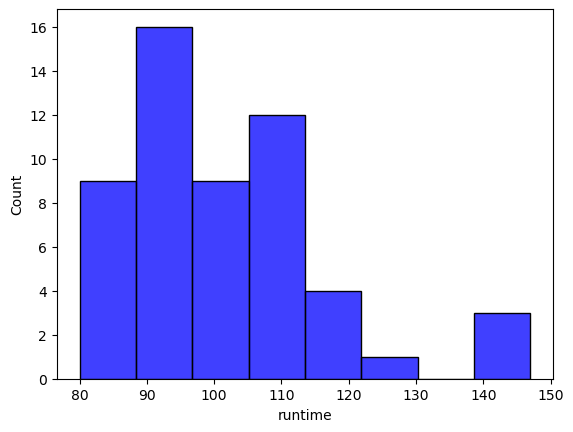

In [12]:
sns.histplot(data.runtime,color='blue')

<Axes: xlabel='popularity', ylabel='production_companies'>

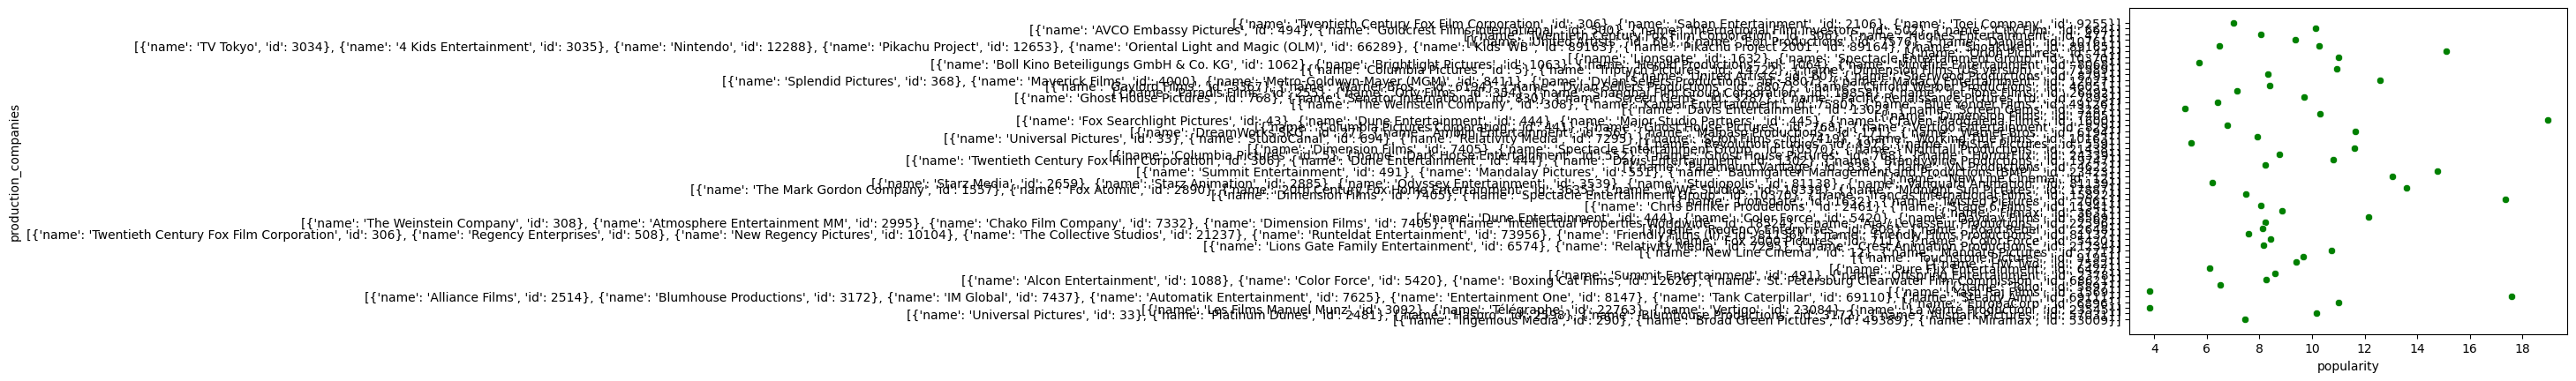

In [13]:
sns.scatterplot(x=data.popularity, y=data.production_companies,color='green')

<Axes: xlabel='revenue', ylabel='budget'>

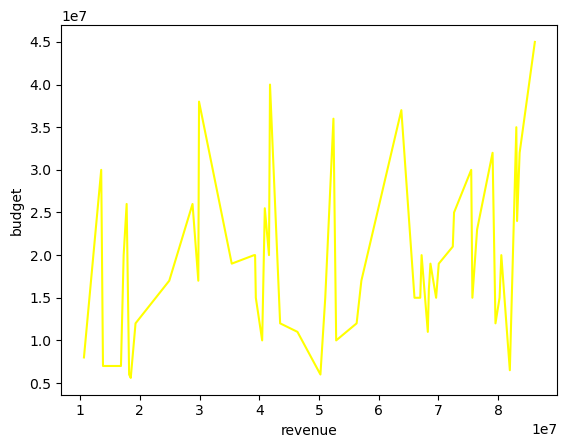

In [39]:
sns.lineplot(x=data.revenue, y= data.budget, color='yellow')

<Axes: xlabel='budget', ylabel='revenue'>

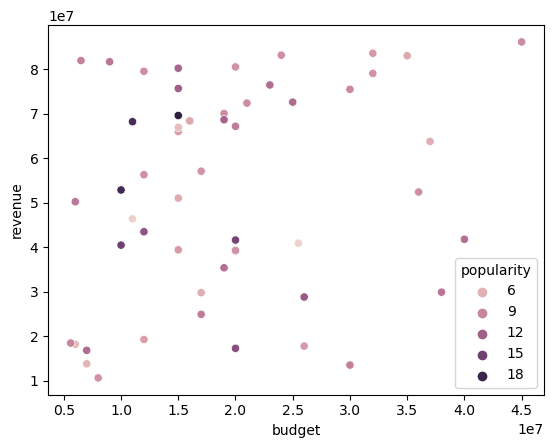

In [17]:
sns.scatterplot(x=data.budget,y=data.revenue,hue=data.popularity)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


AttributeError: module 'matplotlib' has no attribute 'xlabel'

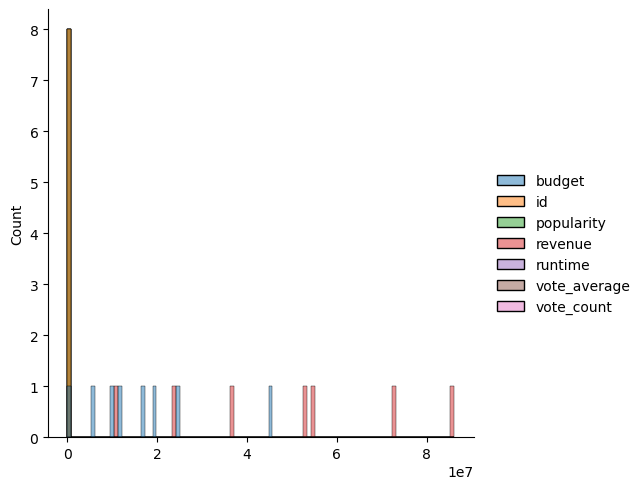

In [19]:
sns.displot(data.describe())
plt.xlabel('frequency');
plt.title('Distribution plot')

In [23]:
movie_data=data[data.budget<40000000]
movie_data.title

178        Mighty Morphin Power Rangers: The Movie
1094                          Escape from New York
1627                                  Home Alone 3
3511               On Her Majesty's Secret Service
4114                 Pokémon: Spell of the Unknown
4442              Bill & Ted's Excellent Adventure
6152                         House of 1000 Corpses
6723                             House of the Dead
6805                                     Bad Santa
6827                                      WarGames
7192        Agent Cody Banks 2: Destination London
7916                            A Cinderella Story
9211                                          2046
9654                                     Boogeyman
10707                                  Hoodwinked!
10802                        When a Stranger Calls
10815                                        Pulse
10857                          The Hills Have Eyes
11329                                 The Grudge 2
11492                        Le

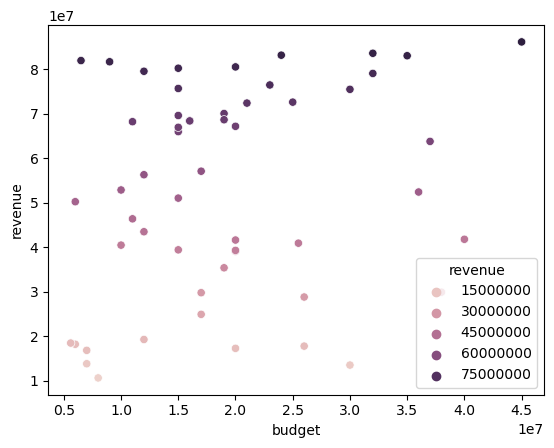

In [24]:
sns.scatterplot(x=data.budget,y=data.revenue, hue=data['revenue']);

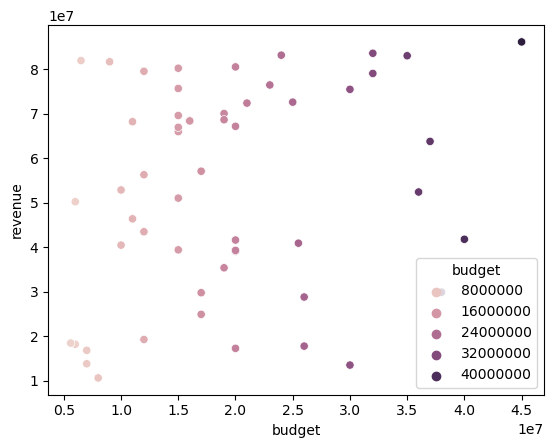

In [25]:
sns.scatterplot(x=data.budget,y=data.revenue, hue=data['budget']);

In [26]:
data.revenue.mean()

52898503.59259259

In [28]:
data.revenue.skew()

-0.3013163832141719

In [29]:
data.revenue.kurtosis()

-1.2588612995465656

In [32]:
data.revenue.describe()

count    5.400000e+01
mean     5.289850e+07
std      2.349080e+07
min      1.062932e+07
25%      3.632637e+07
50%      5.459589e+07
75%      7.257660e+07
max      8.616565e+07
Name: revenue, dtype: float64